# <span style="color:darkred"> Laboratorio di Simulazione Numerica </span>
## <span style="color:darkorange">  Esercitazione 1</span>

## 01.01

Nella prima parte dell'esercizio ho calcolato il valore di
$$\langle r \rangle = \int_0^1 r dr = 1/2\ ,$$
per testare la bontà del generatore di numeri casuali. Ho generato $M$ numeri casuali uniformemente distribuiti nell'intervallo $[0,1]$ che rappresentano le misure di $r$ e ho calcolato la media statistica implementando il metodo dei blocchi. Questo consiste nel dividere $M$ in $N<M$ blocchi contenenti ciascuno un numero $L = M/N$ di misure di $r$. In questo modo è come se ogni blocco fosse un esperimento a se stante. Successivamente si calcola la media aritmetica $\langle r \rangle $ e la media al quadrato $\langle r \rangle^2$ all'interno di ogni blocco. Durante la simulazione viene calcolata progressivamente la media utilizzando i risultati dei blocchi, così da ottenere una stima sempre più precisa man mano che si procede nel numero del blocco. Infine ho calcolato l'incertezza statistica relativa al blocco $i$ tramite la seguente equazione:
$$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N r^2_i - \left( \frac{1}{N} \sum_{i=1}^N r_i \right)^2 \right]} \space ,$$
con 
$$ \frac{1}{N} \sum_{i=1}^N r^2_i  \simeq \langle r^2 \rangle \quad \quad  \left( \frac{1}{N} \sum_{i=1}^N r_i \right)^2 \simeq\langle r\rangle^2 \space .$$

Per il primo blocco ($N = 1$) non è possibile calcolare l'incertezza e così l'ho considerata nulla. Dopo aver implementato il calcolo della media a blocchi ho deciso di creare una funzione *DataBlocking* per essere più rapida nella scrittura. La funzione chiede in input il vettore di misure, il numero di misure $M$, il numero di blocchi $N$ e altri due vettori su cui scrivere la media progressiva e l'errore statistico.

Ho effettuato $M = 10^{5}$ misure e ho diviso la simulazione in $N = 100$ blocchi. Di seguito ho riportato le stime di $\langle r \rangle$ e le incertezze in funzione del numero di blocchi. Ho trovato un risultato compatibile con quello atteso, rappresentato dalla linea continua orizzontale.

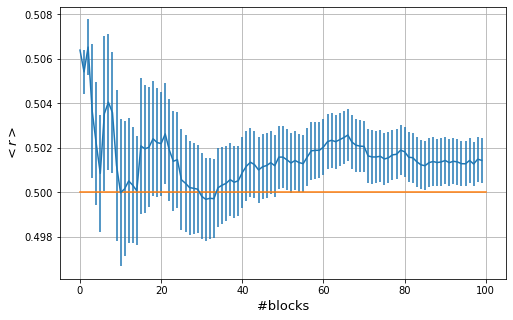

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats

M=100000
N=100
x=np.arange(N)
(sum_prog, err_prog)=np.loadtxt('01.1/results01.1.txt', unpack=True, usecols=(0, 1))

plt.figure(figsize=(8, 5))
plt.errorbar(x,sum_prog,yerr=err_prog)
plt.xlabel('#blocks', fontsize=13)
plt.ylabel('$<r>$', fontsize=13)
plt.plot([0, N], [0.5, 0.5])
plt.grid(True)
plt.show()

Nella seconda parte dell'esercizio ho calcolato il valore di
$$\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12 \space ,$$
allo stesso modo di quanto ho spiegato sopra. Riporto il grafico con i valori calcolati effettuando $M = 10^{5}$ misure e dividendo la simulazione in $N = 100$ blocchi. Ho trovato un risultato statisticamenre compatibile con quello atteso, rappresentato dalla linea continua orizzontale, ma fuori dalle barre di errore.

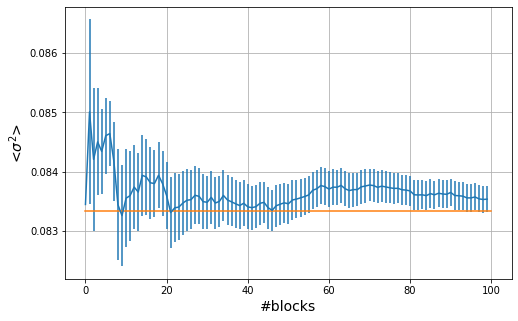

In [2]:
(sigma2, err_sigma2)=np.loadtxt('01.1/results01.1.txt', unpack=True, usecols=(2, 3))

plt.figure(figsize=(8, 5))
plt.errorbar(x,sigma2,yerr=err_sigma2)
plt.xlabel('#blocks', fontsize=14)
plt.ylabel('<$\sigma^2$>', fontsize=14)
plt.plot([0, N], [1/12, 1/12])
plt.grid(True)
plt.show()

Nella terza parte ho implementato il test del $\chi^2$ per verificare che il generatore di numeri casuali fornitomi fosse un buon generatore e quindi che generasse in modo corretto numeri distribuiti uniformemente nell'intervallo desiderato. Tale test è una misura dell'errore fra le osservazioni $O_i$ e i valori attesi $E_i$, ottenibile tramite l'equazione:
$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i} \space .$$
Ho diviso l'intervallo $[0,1]$ in $100$ sottointervalli e ho generato i primi $10^{4}$ numeri casuali verificando quanti di questi fossero contenuti nel primo sottointervallo, analogamente ho fatto per i successivi $10^{4}$ e così via. Ho ottenuto il $\chi^2$ calcolando il rapporto fra la somma su tutti gli intervalli della differenza tra gli eventi contati e gli eventi attesi al quadrato, e gli eventi attesi. In media ci si aspetta che il rapporto valga $1$ e quindi $\chi^2 = 100$.

Ho riportato i valori ottenuti del $\chi^2$ nel grafico sottostante. La linea continua rappresenta $\chi^2 = 100$ e come si osserva sono distribuiti circa attorno ad esso e quindi il generatore di numeri casuali fornito è un buon generatore

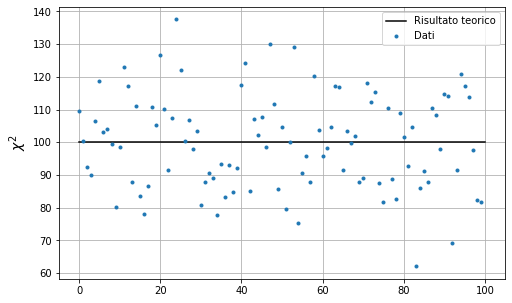

In [3]:
(chi2)=np.loadtxt('01.1/results01.1.txt', unpack=True, usecols=(4))

plt.figure(figsize=(8, 5))
plt.errorbar(x, chi2, marker=".", linestyle=" ", label="Dati")
plt.plot([0., N], [100, 100], color='black', label="Risultato teorico")
plt.ylabel('$\chi^2$', fontsize=14)
plt.legend()
plt.grid(True)

## 01.02

Ho aggiunto le seguenti distribuzioni di probabilità al generatore random fornito:

1) esponenziale $p(x) = exp(- \lambda x)$ , con $\lambda = 1$

2) Cauchy-Lorentz $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, con $\mu = 0$ e $\Gamma = 1$

Riporto di seguito i grafici di $10^{4}$ quantià $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ con $N =1, 2, 10, 100$, in le $x_i$ sono numeri generati rispettivamente secondo una distribuzione uniforme, esponenziale e di Cauchy-Lorentz. Andando a scrivere la somma di un numero sempre piu grande di elementi ho notato che la distribuzione uniforme e quella esponenziale tendono a diventare una gaussiana. Il Teorema del Limite Centrale afferma infatti che se le variabili sommate sono indipendenti, identicamente distribuite e a varianza finita si ha che la distribuzione di $S_N$, ovvero $P\bigl(S_N = \frac{1}{N}\sum_{i=1}^N x_i\bigr)$, con $N$ molto grande assume la forma della gaussiana. Ho deciso di fare un fit gaussiano per i risultati con $N=100$.
Questo però non accade per la distribuzione di Cauchy-Lorentz che mantiene la sua forma di lorentziana per ogni $N$. Per questa ho quindi deciso di fare un fit lorentziano. Il Teorema del Limite Centrale non vale per Cauchy-Lorentz poichè il secondo momento di tale distribuzione non è finito.


Fit parameters for N=100: mu = 0.4998305945 sigma = 0.028550639862974517



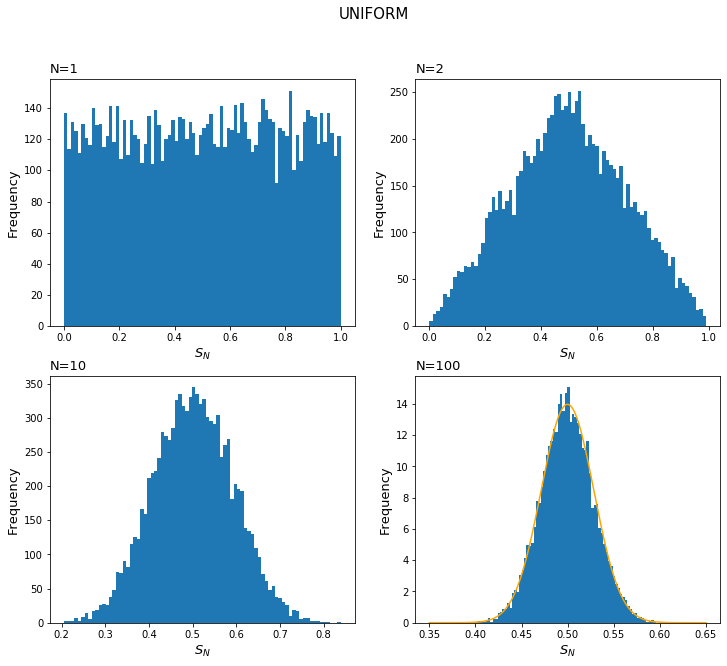

In [7]:
(S1, S2, S10, S100)=np.loadtxt('01.2/uniform.txt', unpack=True, usecols=(0, 1, 2, 3))
fig, axs = plt.subplots(2, 2, figsize=(12,10))
plt.suptitle('UNIFORM', fontsize=15)

axs[0,0].set_title('N=1', loc='left', fontsize=13)
axs[0,0].hist(S1, bins=80)

axs[0,1].set_title('N=2', loc='left', fontsize=13)
axs[0,1].hist(S2, bins=80)

axs[1,0].set_title('N=10', loc='left', fontsize=13)
axs[1,0].hist(S10, bins=80)

axs[1,1].set_title('N=100', loc='left', fontsize=13)
axs[1,1].hist(S100, bins=80, density=True)

# find minimum and maximum of xticks, so we know
# where we should compute theoretical distribution
xt=plt.xticks()[0]
xmin, xmax = min(xt), max(xt)
lnspc = np.linspace(xmin, xmax, len(S100))

# let's try the normal distribution first
m, s = stats.norm.fit(S100) # get mean and stdDev
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval
axs[1,1].plot(lnspc, pdf_g, label="Norm", color="orange")

for ax in axs.flat:
    ax.set_ylabel('Frequency', fontsize=13)
    ax.set_xlabel('$S_N$', fontsize=13)

print()
print('Fit parameters for N=100: mu =', m, 'sigma =', s)
print()


Fit parameters for N=100: mu = 0.9994180188 sigma = 0.09998641289439604



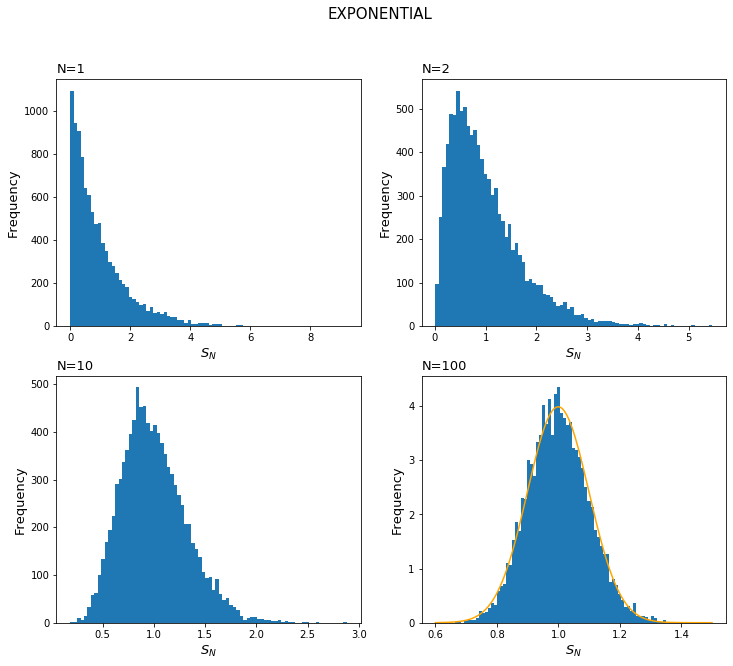

In [8]:
(S1, S2, S10, S100)=np.loadtxt('01.2/exponential.txt', unpack=True, usecols=(0, 1, 2, 3))
fig, axs = plt.subplots(2, 2, figsize=(12,10))
plt.suptitle('EXPONENTIAL', fontsize=15)

axs[0,0].set_title('N=1', loc='left', fontsize=13)
axs[0,0].hist(S1, bins=80)

axs[0,1].set_title('N=2', loc='left', fontsize=13)
axs[0,1].hist(S2, bins=80)

axs[1,0].set_title('N=10', loc='left', fontsize=13)
axs[1,0].hist(S10, bins=80)

axs[1,1].set_title('N=100', loc='left', fontsize=13)
axs[1,1].hist(S100, bins=80, density=True)

# find minimum and maximum of xticks, so we know
# where we should compute theoretical distribution
xt=plt.xticks()[0]
xmin, xmax = min(xt), max(xt)
lnspc = np.linspace(xmin, xmax, len(S100))

# let's try the normal distribution first
m, s = stats.norm.fit(S100) # get mean and stdDev
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval
axs[1,1].plot(lnspc, pdf_g, label="Norm", color="orange")

for ax in axs.flat:
    ax.set_ylabel('Frequency', fontsize=13)
    ax.set_xlabel('$S_N$', fontsize=13)

print()
print('Fit parameters for N=100: mu =', m, 'sigma =', s)
print()

Fit parameters of the distribution:

N=1  mu = 0.014569099769672932 gamma = 0.9915465295881414

N=2  mu = 0.018401180001605198 gamma = 1.011060447274815

N=10  mu = 0.005303272383579778 gamma = 0.9922491405900706

N=100  mu = 0.0017144926439186452 gamma = 0.9685078357539605



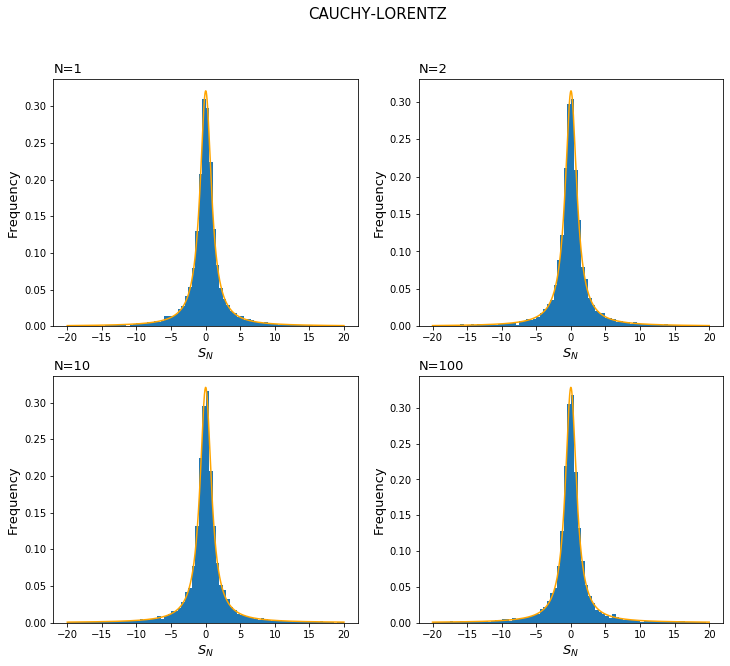

In [9]:
(S1, S2, S10, S100)=np.loadtxt('01.2/cauchy.txt', unpack=True, usecols=(0, 1, 2, 3))
fig, axs = plt.subplots(2, 2, figsize=(12,10))
plt.suptitle('CAUCHY-LORENTZ', fontsize=15)

axs[0,0].set_title('N=1', loc='left', fontsize=13)
axs[0,0].hist(S1, bins=80, range=(-20,20), density=True)

xt=plt.xticks()[0]
xmin, xmax = -20, 20
lnspc = np.linspace(xmin, xmax, len(S1))

m, s = stats.cauchy.fit(S1)
pdf_g = stats.cauchy.pdf(lnspc, m, s)
axs[0,0].plot(lnspc, pdf_g, label="Norm", color="orange")
print('Fit parameters of the distribution:')
print()
print('N=1  mu =', m, 'gamma =', s)

axs[0,1].set_title('N=2', loc='left', fontsize=13)
axs[0,1].hist(S2, bins=80, range=(-20,20), density=True)

xt=plt.xticks()[0]
xmin, xmax = -20, 20
lnspc = np.linspace(xmin, xmax, len(S2))

m, s = stats.cauchy.fit(S2)
pdf_g = stats.cauchy.pdf(lnspc, m, s)
axs[0,1].plot(lnspc, pdf_g, label="Norm", color="orange")
print()
print('N=2  mu =', m, 'gamma =', s)
print()

axs[1,0].set_title('N=10', loc='left', fontsize=13)
axs[1,0].hist(S10, bins=80, range=(-20,20), density=True)

xt=plt.xticks()[0]
xmin, xmax = -20, 20
lnspc = np.linspace(xmin, xmax, len(S10))

m, s = stats.cauchy.fit(S10)
pdf_g = stats.cauchy.pdf(lnspc, m, s)
axs[1,0].plot(lnspc, pdf_g, label="Norm", color="orange")
print('N=10  mu =', m, 'gamma =', s)
print()

axs[1,1].set_title('N=100', loc='left', fontsize=13)
axs[1,1].hist(S100, bins=80, range=(-20,20), density=True)

xt=plt.xticks()[0]
xmin, xmax = -20, 20
lnspc = np.linspace(xmin, xmax, len(S100))

m, s = stats.cauchy.fit(S100)
pdf_g = stats.cauchy.pdf(lnspc, m, s)
axs[1,1].plot(lnspc, pdf_g, label="Norm", color="orange")
print('N=100  mu =', m, 'gamma =', s)
print()

for ax in axs.flat:
    ax.set_ylabel('Frequency', fontsize=13)
    ax.set_xlabel('$S_N$', fontsize=13)

## 01.3

In questo esercizio ho simulato l'esperimento di Buffon per valutare il valore di $\pi$. L'esperimento si svolge nel seguente modo: viene lanciato casualmente un bastoncino di lunghezza $L$ in un piano orizzontale in cui è tracciato un reticolo con linee orizzontali distanti $d$, con $d>L$. La probabilità che il bastoncino intersechi una delle righe è $P = 2L/\pi d$ e quindi invertendo la relazione si può trovare il valore di $\pi$.

Ho scelto la lunghezza del bastoncino $L = 0.9$ e la distanza fra le righe del reticolo $d=1$. Ho considerato $M=10^{5}$ esperimenti divisi in $N=100$ blocchi. Per implementare l'esperimento ho effettuato $10^{4}$ lanci generando un numero distribuito uniformemente nell'intervallo $[0, L]$ che descrivesse l'altezza a cui è andato a posizionarsi ad ogni lancio il centro del bastoncino e generando anche un angolo $ \theta \in [0,\pi]$ per poter descrivere la rotazione del bastoncino. Ho scritto l'angolo come $\theta = arcos(\sqrt{x^2 + y^2})$ con $x \in [-1, 1]$ e $y \in [0, 1]$ distribuiti uniformemente e in modo che descrivessero una semicirconferenza. In seguito ho calcolato la posizione della cima e della coda del bastoncino e ho contato quante volte sul totale dei lanci queste intersecassero la linea del reticolo. Il rapporto fra queste e il totale costituisce la probabilità e tramite l'equazione sopra riportata si trova il valore di $\pi$.

Ho effettuato poi una media a blocchi dei $10^{5}$ valori di $\pi$ ottenuti e riporto nel grafico sottostante il risultato in funzione del numero dei blocchi. Il risultato è statisticamente accettabile entro $2\sigma$.

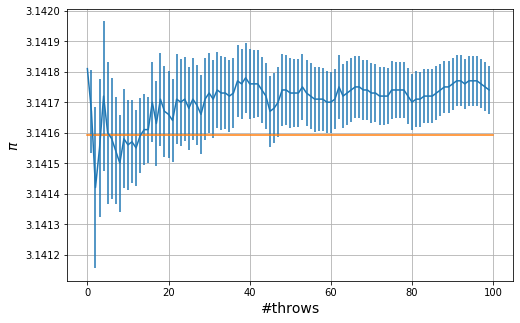

In [30]:
M=100000
N=100
x=np.arange(N)
(sum_prog, err_prog)=np.loadtxt('01.3/results01.3.txt', unpack=True, usecols=(0, 1))

plt.figure(figsize=(8, 5))
plt.errorbar(x, sum_prog, yerr=err_prog)
plt.plot([0, N], [math.pi, math.pi])
plt.xlabel('#throws', fontsize=14)
plt.ylabel('$\pi$', fontsize=14)
plt.grid(True)
plt.show()